# GROUP MEMBERS:


*   SHAHD H. ALHARBI - 2005527
*   KHADEJA Y. NJAAI- 2005528
*   RITAJ M. ALMUTAIRI - 2006532



# Algorithms From Scratch

- KMeans
- DBSCAN

## General funcations 

In [ ]:
#methods used in both Kmeans and DBSCAN code
import pandas as pd 

#plot the result
def plot(data1,labels1,centers1,
         data2,labels2,centers2, 
         data3,labels3,centers3,  
         data4, labels4,centers4, 
         KMeans=False):
  
    plt.figure(figsize=(15, 15))

    data = {1:data1, 2:data2, 3:data3, 4:data4}

    labels = {1:labels1, 2:labels2, 3:labels3, 4:labels4}

    titles = {1:"Make_blobs Dataset1", 
              2:"Make_blobs Dataset1", 
              3:"Make_blobs Dataset2", 
              4:"make_circles Dataset4"}

    for i in range(1,5):

      plt.subplot(2,2,i)
      plt.scatter(data[i][:,0], data[i][:,1], c=labels[i])
      plt.title(titles[i])
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")

    if(KMeans): 
      centers = {1:centers1, 2:centers2, 3:centers3, 4:centers4}

      for i in range(1,5):
        plt.subplot(2,2,i)
        plt.scatter(centers[i][:,0],centers[i][:,1], c='red')

    plt.show()
        

# calculate the accuracy  
scores = pd.DataFrame(columns = ["F1 score", "NMI score", "Rand score"])

def accuracy_score(y,labels, name, creatTable=False):
    if(creatTable):
        scores.drop(scores.index, inplace=True)
        
    f1 = f1_score(y, labels, average='macro')
    NMI = normalized_mutual_info_score(y, labels)
    R=rand_score(y, labels)
    
    scores.loc[name] = [f1, NMI, R]

    return scores

## KMeans

**KMeans** is a popular clustering algorithm used in machine learning to group similar data points together. In this repository, we implement the KMeans algorithm from scratch in Python, without using any machine learning libraries.

Our implementation includes the following steps:

- Randomly initialize k cluster centroids
- Assign each data point to the nearest centroid
- Recalculate the centroids as the mean of the data points in each cluster
- Repeat steps 2 and 3 until convergence (i.e. the centroids no longer change)



### Algorithms 

In [ ]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score, rand_score


def Euclidean_Distance(point, center):
      '''
      describe method: Calculate Euclidean distance between a point and a center
        
      parameters:
        point: single point in a dataset.
        center: single centroid in a dataset

      return: result of Euclidean Distance equation 

      '''
      return math.sqrt(np.sum((point - center)**2))



def initialize_centroid(data, k, random_state):
    '''
    describe method: Initialize centroids randomly from the data
      
    parameters:
      data: dataset
      k: number of clusters
      random_state: seed value
    return: centers array

    '''
    
    np.random.seed(random_state) 
    
    center_x = np.random.randint(0, np.max(data)-data[:,0].mean(), size=k)
    center_y = np.random.randint(0, np.max(data)-data[:,1].mean(), size=k)
    # ([(x,y),(x,y),(x,y)])
    center = np.array(list(zip(center_x, center_y)), dtype=np.float32)
    return center


def KMeans(k, random_state, max_iteration, data):
  '''
  describe method: This is the main method
    
  parameters:
    k: number of clusters
    random_state:  seed value
    max_iteration: maximum number of iterations
    data: dataset
    
  return: centers and labels arrays

  '''
  
  ## -------------------------------------
  ## Initialize Centroid 
  ## -------------------------------------

  centers = initialize_centroid(data, k, random_state)

  for i in range(max_iteration):
      clusters = [ [] for _ in range(k)] 
      labels = [] 

      ## ----------------------------------------
      ## ASSIGN POINTS 
      ## ----------------------------------------
      
      for j, point in enumerate(data): 

          ED = [Euclidean_Distance(point, centers[index]) for index in range(0, len(centers))]
          cluster_index = ED.index(min(ED))

          clusters[cluster_index].append(point)
          labels.append(cluster_index)

          
      ## ------------------------------------ 
      ## UPDATE CENTROIEDS 
      ## ------------------------------------
      New_centers = np.zeros((k, data.shape[1]))

      for j in range(k):
          if clusters[j]:
              New_centers[j] = np.mean(clusters[j], axis=0)
      
      
      #np.allclose() to check if the new centroids are close enough to the previous ones, to determine convergence.
      if np.allclose(New_centers, centers):
          break

      centers = New_centers

  return centers, labels  




### Datasets and Validation

<ipython-input-79-13c87a4a4f86>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


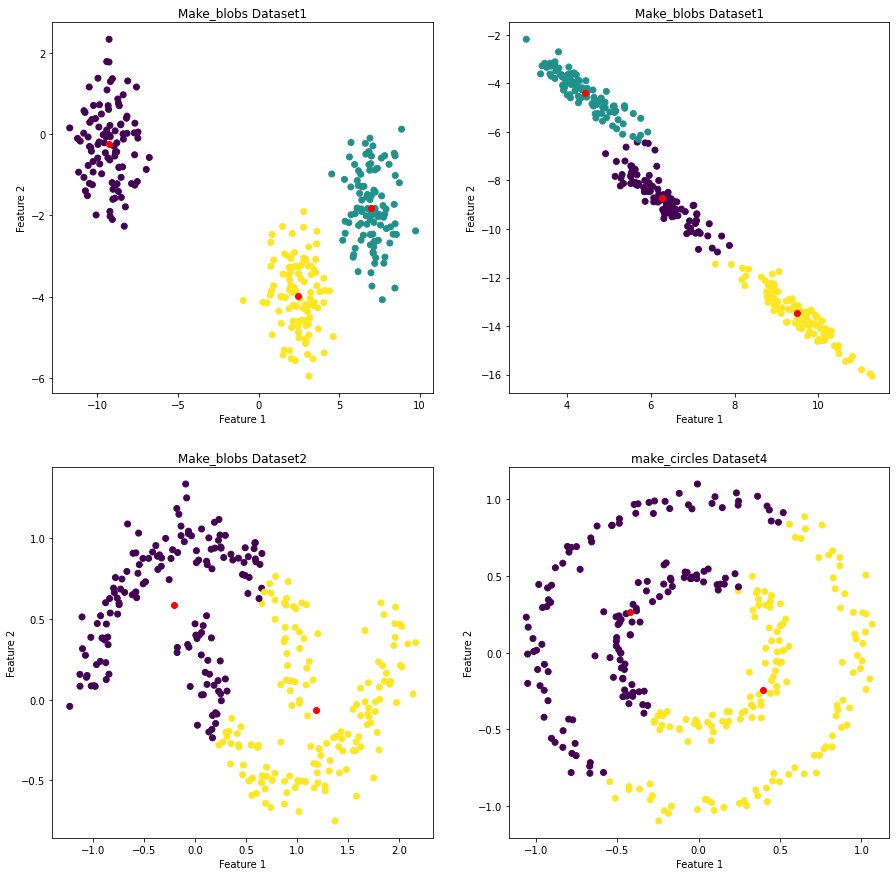

In [ ]:
#Random state calculation:
#2005528: 2+0+0+5+5+2+8 = 22
#2005527: 2+0+0+5+5+2+7 = 21
#2006532: 2+0+0+6+5+3+2 = 18

k = 3
random_state = 61
max_iteration = 150
n_samples = 300

#Dataset1
data1,y1 = make_blobs(n_samples=n_samples, centers=k , random_state=random_state+1)
centers1, labels1 = KMeans(k,random_state, max_iteration, data1) 

#Dataset2
data2, y2 = make_blobs(n_samples=n_samples,centers=k, random_state=random_state)
# Preprocessing data, clean or reduce or expand or generate feature representations.
transformation = [[0.6, -0.6], [-0.4, 0.8]]
data2 = np.dot(data2, transformation)
centers2, labels2 = KMeans(k, random_state, max_iteration, data2)

#Dataset3
# noise = dataset are randomly shifted from their original position on the ideal "moon" shapes
data3, y3 = make_moons(n_samples=n_samples, noise=0.1, random_state=random_state)
centers3, labels3 = KMeans(2, random_state, max_iteration, data3)


#      y = [0,1,1,1,0,2]
# labels = [1,0,0,0,1,2]
# We noticed that true cluster labels are 0 and 1.
# But our predicted cluster labels are 1,2. So, 
# even if the points were assigned to the same cluster, 
# the difference in clustering expression affected the f1 scores bacuase its sensitive.

for i in range(len(labels1)):
  if labels1[i] == 0: labels1[i] = 1
  elif labels1[i] == 1: labels1[i] = 0
  else: continue

for i in range(len(labels3)):
  if labels3[i] == 1 : labels3[i] = 0
  elif labels3[i] == 0: labels3[i] = 1
  else: continue


#Dataset4
# factor = distances between inner and outer circles 
data4,y4 = make_circles(n_samples=n_samples, factor=0.5, noise=.05,random_state=random_state)
centers4, labels4 = KMeans(2, random_state, max_iteration, data4)


#plot
plot(data1,labels1,centers1, data2,labels2,centers2,  data3,labels3,centers3,   data4, labels4,centers4 , KMeans=True)

In [ ]:
#Calculating the validation 

accuracy_score(y1, labels1, "make_blobs dataset1", creatTable=True)
accuracy_score(y2, labels2, "make_blobs dataset2")
accuracy_score(y3, labels3, "make_moons dataset")
accuracy_score(y4, labels4, "make_circles dataset")
scoresKMeans = scores.copy()
display(scoresKMeans)

,F1 score,NMI score,Rand score
make_blobs dataset1,1.000000,1.000000,1.000000
make_blobs dataset2,0.970081,0.883869,0.961003
make_moons dataset,0.753322,0.194105,0.627113
make_circles dataset,0.506579,0.000128,0.498417



### Conclusion

KMeans performs well in clustering the first and second datasets, as evidenced by their high measure scores. However, it does not perform well with the third and fourth datasets due to the limitations of the KMeans algorithm, which cannot effectively identify the shapes of the data.




---


## DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a popular unsupervised learning method utilized in model building and machine learning algorithms. Unsupervised learning methods are when there is no clear objective or outcome we are seeking to find. Instead, we are clustering the data together based on the similarity of observations.

Steps:


*   Classify each point as core, boarder and noise 
*   Eliminate noise points
*   For every core point, that has not been assigned to any cluster
*   *   generate a new cluster for this cluster and all the Density-Connected to p.
*   Assign boarder points to cluster, of the closest core point.






### Algorithm

In [ ]:
#Import Required Library 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import rand_score

#-------------------------------

def dbscan(data, eps, minPts):
    '''
    describe method: This is the main method
    
    parameters:
      data: the dataset
      eps: epsilon value
      minPts: minimum number of points 
    
    return: Array of points' labels
    '''

    #First, Assign all points' labels as nigative one, Indicating that points unvisited
    labels = [-2 for i in range(len(data))]

    cluster_id = 0

    #This loop will visit all points in the dataset
    for point in range(0, len(data)):
        #the point is already assigned to a cluster 
        if not (labels[point] == -2):
            continue 
        
        neighbors = find_neighbors(point, eps, data)
        
        #If the number is below MinPts, this point is noise.  
        if(len(neighbors) < minPts): 
            labels[point] = -1

        #Otherwise, if there are at least MinPts nearby, use this point as the seed for a new cluster
        else:
            expand_clusters(eps, minPts,data, labels, neighbors, cluster_id, point)
            cluster_id += 1
            
            
    
    return labels
            
#-------------------------------------
      
def expand_clusters(eps, minPts, data, labels, neighbors, cluster_id, point):
    '''
    describe: This function will expand the cluster
    
    parameters:
      eps: epsilon value
      minPts: minimum number of points
      data: datasets
      labels: the number of cluster id of which a point belongs to 
      neighbors: neighbors array
      cluster_id: cluster number
      point: data point

    return: None
    '''
    #Assign the label of a point to its cluster Number
    labels[point] = cluster_id
    
    
    i = 0 
    #This loop will visit all neighbor points
    while( i < len(neighbors)):

        #A current point is each point being handle at each run
        current_point = neighbors[i]
       
        #if a point is not assigned to cluster yet
        if(labels[current_point] == -2): 

            #aasign the point to the cluster 
            labels[current_point] = cluster_id
            
            #Find the neighbors of the current point (Neighbors of neighbors)
            current_point_neighbors = find_neighbors(current_point, eps, data)
            
            #A core point
            if(len(current_point_neighbors) >= minPts):
              #Concatonate the neigghbors of the points, to expand the cluster
                neighbors = neighbors + current_point_neighbors
                         
        #Assign Boarder point
        elif(labels[current_point] == -1):
          #Re-assign a noise point to boarder point. Because its a neighbor of a core point
            labels[current_point] = cluster_id
    
        i+=1
    
#-------------------------------------

def find_neighbors(point, eps, data) :
    '''
    describe: This function is suppposed to find all the neighbors of a point
    
    parameters:
      point: given point
      eps: the value of the epsilon
      data: given dataset

      return: Array of points' neighbors
    '''

    #An array to holds the all the neighbors
    neighbors = []

    
    for i in range(0, len(data)):

        if(np.linalg.norm(data[point] - data[i]) < eps):
            neighbors.append(i)

    #Return the neighbors array        
    return neighbors



### Datasets and Validations

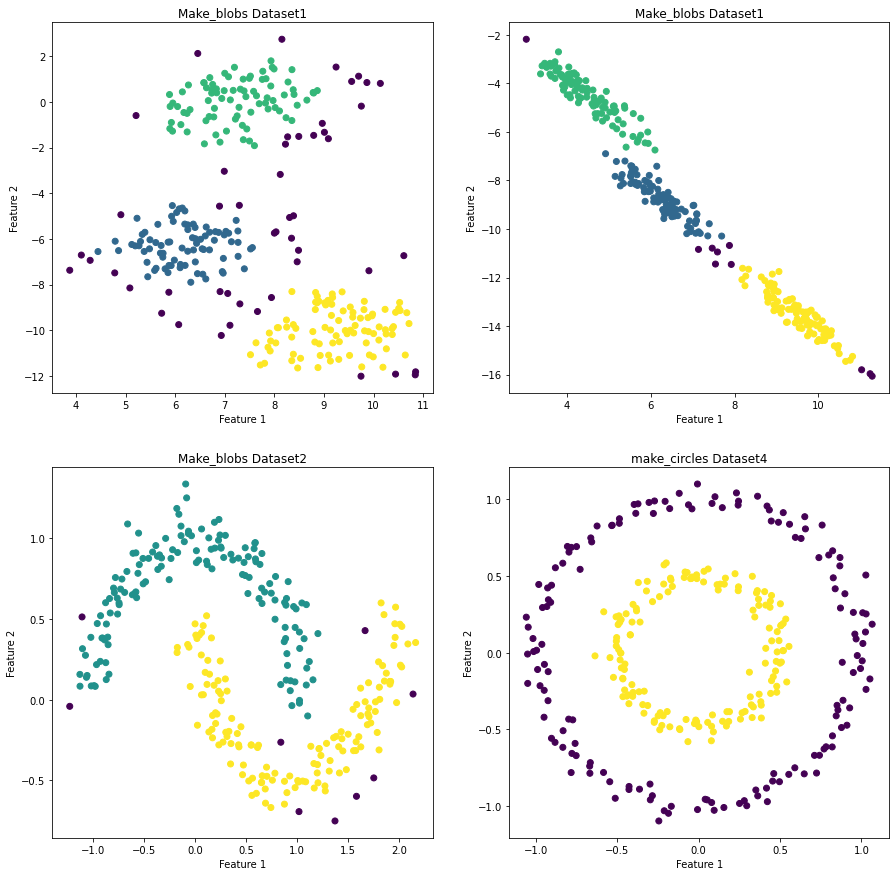

In [ ]:
#Random state calculation:
#2005528: 2+0+0+5+5+2+8 = 22
#2005527: 2+0+0+5+5+2+7 = 21
#2006532: 2+0+0+6+5+3+2 = 18
#random state = 61

random_state = 61 
n_samples = 300
centers = 3

#Dataset1
data1, y1 = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)

labels1 = dbscan(data=data1, eps=0.52, minPts=5)

#Dataset2
data2, y2 = make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]

data2 = np.dot(data2, transformation)

labels2 = dbscan(data=data2, eps=0.45, minPts=5)


#Dataset3
data3, y3 = make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)
labels3 = dbscan(data = data3, eps=0.14, minPts=4)


#Dataset4
data4,y4 = make_circles(n_samples=n_samples, factor=.5, noise=.05 ,random_state=random_state)
labels4 = dbscan(data = data4, eps=0.18, minPts=5)


# We noticed that true cluster labels are 0 and 1.
# our predicted cluster labels are 1,0. So, 
# even if the points were assigned to the same cluster, 
# the difference in clustering expression affected the f1 scores.
for i in range(len(labels3)):
  if labels3[i] == 1 : labels3[i] = 0
  elif labels3[i] == 0: labels3[i] = 1
  else: continue

for i in range(len(labels4)):
  if labels4[i] == 1 : labels4[i] = 0
  elif labels4[i] == 0: labels4[i] = 1
  else: continue



#plot
plot(data1,labels1,_, data2,labels2,_,  data3,labels3,_,  data4, labels4,_ )


In [ ]:
#Calculating the validation 
accuracy_score(y1, labels1, "make_blobs dataset1", creatTable=True)
accuracy_score(y2, labels2, "make_blobs dataset2")
accuracy_score(y3, labels3, "make_moons dataset")
accuracy_score(y4, labels4, "make_circles dataset")
scoresDBSCAN = scores.copy()
display(scoresDBSCAN)

,F1 score,NMI score,Rand score
make_blobs dataset1,0.682947,0.750599,0.892241
make_blobs dataset2,0.732169,0.893142,0.969454
make_moons dataset,0.656466,0.902948,0.970769
make_circles dataset,1.000000,1.000000,1.000000


### Conclusion
DBSCAN is effective in clustering points and identifying noise, as demonstrated by the previous table that shows the accuracy for all four datasets. The first and second datasets show decent accuracy compared to KMeans, while the third and fourth datasets exhibit significantly better results in DBSCAN than in KMeans.
____

# SKLeran

---
## GMM SKlearn

In [ ]:
#Import necessary libraries

import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import rand_score


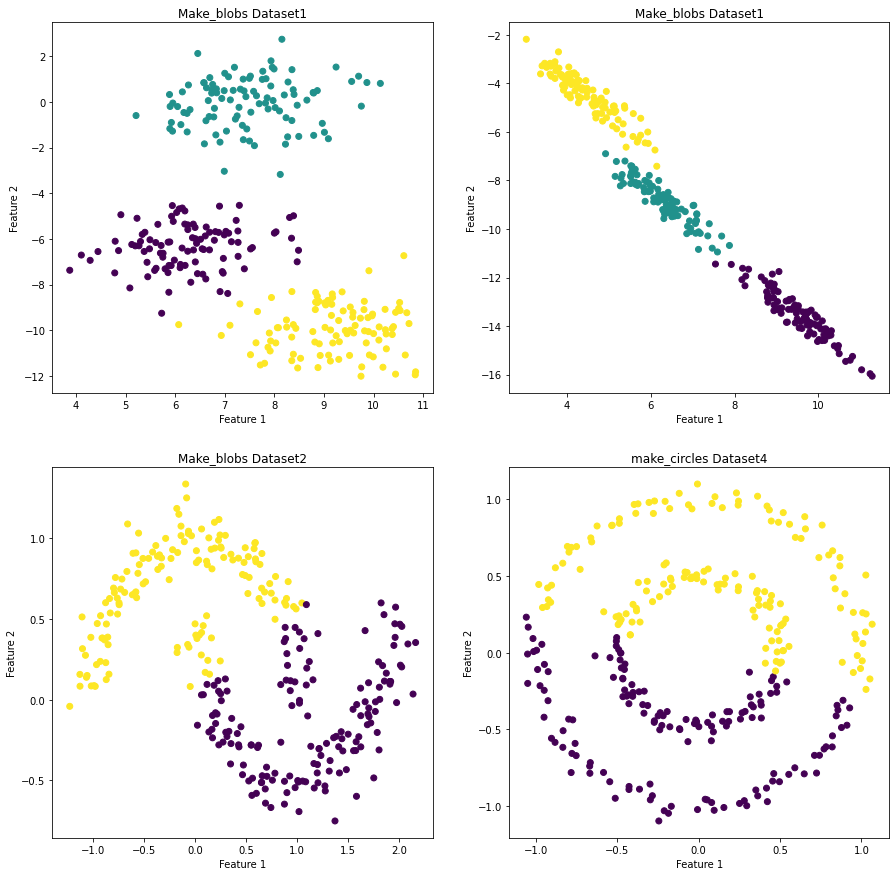

In [ ]:
#Parameters used in the functions
random_state = 61 
n_samples = 300
centers = 3

#Dataset1
data1, y1 = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)


#Dataset2
data2, y2 = make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
data2 = np.dot(data2, transformation)

#Dataset3
data3, y3 = make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

#Dataset4
data4,y4 = make_circles(n_samples=n_samples, factor=.5, noise=.05 ,random_state=random_state)

#--------------GMM MODELS--------------
gmm_makeblob = GaussianMixture(n_components=3).fit(data1)
labels_makeblob= gmm_makeblob.predict(data1)


gmm_transformedMakeblobs = GaussianMixture(n_components=3).fit(data2)
labels_transformedMakeblobs = gmm_transformedMakeblobs.predict(data2)

gmm_moons = GaussianMixture(n_components=2).fit(data3)
labels_moons = gmm_moons.predict(data3)


gmm_circles= GaussianMixture(n_components=2).fit(data4)
labels_circles = gmm_circles.predict(data4)

#plot
plot(data1,labels_makeblob,_, data2,labels_transformedMakeblobs,_,  data3,labels_moons,_,  data4,labels_circles,_ )


#### Cluster validation

In [ ]:
#Calculating the validation 
accuracy_score(y1, labels_makeblob, "make_blobs dataset1", creatTable=True)
accuracy_score(y2, labels_transformedMakeblobs, "make_blobs dataset2")
accuracy_score(y3, labels_moons, "make_moons dataset")
accuracy_score(y4, labels_circles, "make_circles dataset")
scoresGMM = scores.copy()
display(scoresGMM)

,F1 score,NMI score,Rand score
make_blobs dataset1,0.990000,9.532462e-01,0.986823
make_blobs dataset2,0.006633,9.532462e-01,0.986823
make_moons dataset,0.139656,4.172512e-01,0.758395
make_circles dataset,0.499978,6.407264e-16,0.498328


###Conclusion:
The GMM algorithm's effectiveness in clustering data points varies based on the dataset being used. 
The algorithm achieved *high* NMI, and Rand scores for the first "make_blobs" **dataset1**, so, it was highly effective in clustering dataset1.

However, the algorithm's effectiveness was considerably lower for the 3rd and 4th datasets.


----
## Hierarcihal SKlearn

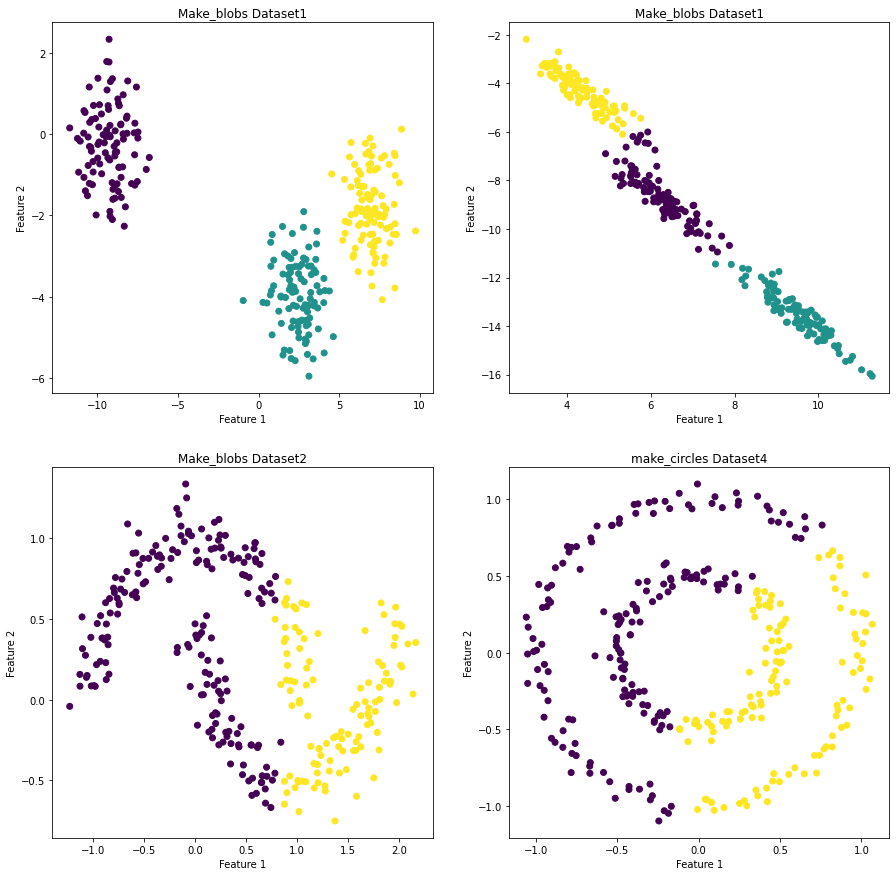

In [ ]:
#Parameters used in the functions
random_state = 61 
n_samples = 300
centers = 3

#--------------DATASETS--------------
#Dataset1
data1, y1 = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state+1)


#Dataset2
data2, y2 = make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
data2 = np.dot(data2, transformation)

#Dataset3
data3, y3 = make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

#Dataset4
data4,y4 = make_circles(n_samples=n_samples, factor=.5, noise=.05 ,random_state=random_state)

#--------------MODELS--------------
#Create herarical model and fit it
HC = AgglomerativeClustering(n_clusters=3, linkage ='ward').fit(data1)  

#Predicted Clusters
HCLabels = HC.labels_


HC_transformedMakeblobs = AgglomerativeClustering(n_clusters=3, linkage ='ward').fit(data2)
HCLabels_tMabeblobs = HC_transformedMakeblobs.labels_

HC_moons = AgglomerativeClustering(n_clusters=2, linkage ='ward').fit(data3) 
HC_MoonsLabels = HC_moons.labels_


HC_circles = AgglomerativeClustering(n_clusters=2, linkage ='ward').fit(data4) 
HC_CirclesLabels = HC_circles.labels_

plot(data1,HCLabels,_, data2,HCLabels_tMabeblobs,_,  data3,HC_MoonsLabels,_,  data4, HC_CirclesLabels,_ )


###### **cluster** **validation**

In [ ]:
#Calculating the validation 
accuracy_score(y1, HCLabels, "make_blobs dataset1", creatTable=True)
accuracy_score(y2, HCLabels_tMabeblobs, "make_blobs dataset2")
accuracy_score(y3, HC_MoonsLabels, "make_moons dataset")
accuracy_score(y4, HC_CirclesLabels, "make_circles dataset")
scoresGMM = scores.copy()
display(scoresGMM)

,F1 score,NMI score,Rand score
make_blobs dataset1,0.333333,1.000000,1.000000
make_blobs dataset2,0.312600,0.853034,0.944682
make_moons dataset,0.658133,0.085968,0.551862
make_circles dataset,0.526713,0.002700,0.500134


#### **Conclusion:**
----------------------------------------
The Hierarcihal algorithm achieved highest scores for the first dataset.

# Application of Our Models In A Real World Datasets 

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


The dataset contains 6 columns and 200 Rows. The gender column is categorical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


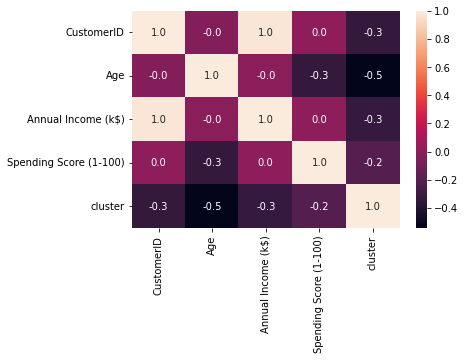

In [ ]:
import seaborn as sns
df.corr()
sns.heatmap(df.corr(),annot=True,fmt='.1f')

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

<BarContainer object of 2 artists>

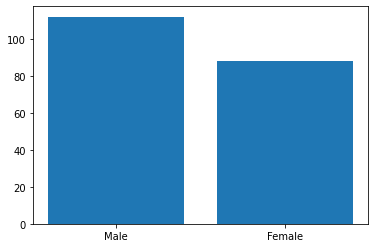

In [ ]:
values = df['Gender'].value_counts()
labels = ['Male', 'Female']
plt.bar(labels, values)

In [ ]:
df.drop(["CustomerID"], axis=1, inplace=True)

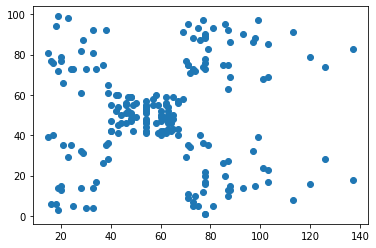

In [ ]:
dataTest = np.array(df[['Annual Income (k$)', "Spending Score (1-100)"]], dtype=np.float32 )
plt.scatter(dataTest[:,0],dataTest[:,1])

#### apply KMeans

,F1 score,NMI score,Rand score
,0.176471,0.853543,0.903065


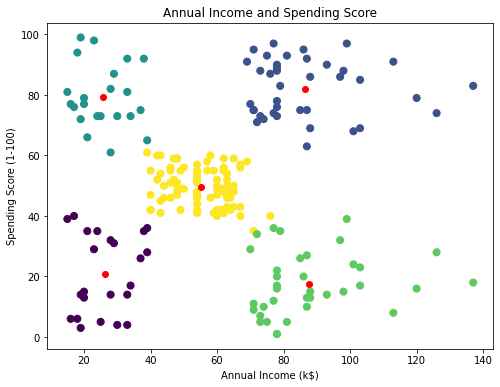

In [ ]:
center, labels = KMeans(k=5, random_state=61, max_iteration=300, data=dataTest)
plt.figure(figsize=(8,6))
plt.scatter(dataTest[:,0], dataTest[:,1], s=50, c=labels)
plt.scatter(center[:,0], center[:,1], c='red')
plt.title("Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

accuracy_score(df["cluster"], labels, "", creatTable=True)

* Customers who have a low annual income but a high spending score
* Customers who have a moderate annual income and a moderate spending score
* Customers who have a high annual income but a low spending score
* Customers who have a high annual income and a high spending score
* Customers who have a low annual income and a low spending score


###DBSCAN


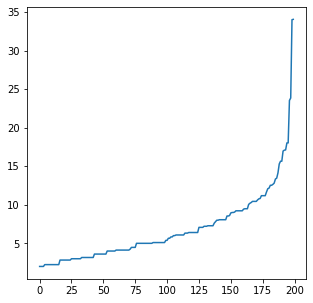

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5).fit(dataTest)

distances, indices = nn.kneighbors(dataTest)
distances = np.sort(distances, axis=0)
distances = distances[:,4]
plt.figure(figsize=(5,5))

plt.plot(distances)


,F1 score,NMI score,Rand score
,0.002597,0.710657,0.843065


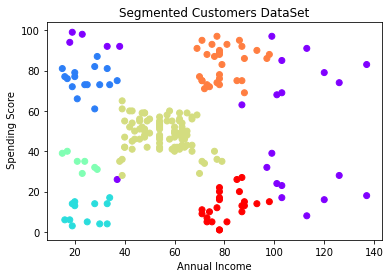

In [ ]:
labels = dbscan(data = dataTest, eps =9, minPts=5)
plt.scatter(dataTest[:,0], dataTest[:,1], c=labels,cmap ='rainbow')
plt.title("Segmented Customers DataSet")
plt.xlabel('Annual Income')
plt.ylabel(' Spending Score')

accuracy_score(df["cluster"], labels, "", creatTable=True)